# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | ploneour-lanvern
Processing Record 3 of Set 1 | mount pearl
Processing Record 4 of Set 1 | barra de santo antonio
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | fale old settlement
Processing Record 7 of Set 1 | ust-nera
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | sanga-sanga
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | huron
Processing Record 12 of Set 1 | thunder bay
Processing Record 13 of Set 1 | aioun
Processing Record 14 of Set 1 | usinsk
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | praia da vitoria
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | tokar
Processing Record 20 of Set 1 | tshabong
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-3.05,85,95,4.25,GS,1686624076
1,ploneour-lanvern,47.9000,-4.2833,14.16,94,0,3.09,FR,1686624409
2,mount pearl,47.5166,-52.7813,7.75,95,100,7.20,CA,1686624187
3,barra de santo antonio,-9.4047,-35.5072,23.60,84,23,4.63,BR,1686624410
4,college,64.8569,-147.8028,17.48,43,75,7.72,US,1686623927


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-3.05,85,95,4.25,GS,1686624076
1,ploneour-lanvern,47.9000,-4.2833,14.16,94,0,3.09,FR,1686624409
2,mount pearl,47.5166,-52.7813,7.75,95,100,7.20,CA,1686624187
3,barra de santo antonio,-9.4047,-35.5072,23.60,84,23,4.63,BR,1686624410
4,college,64.8569,-147.8028,17.48,43,75,7.72,US,1686623927


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

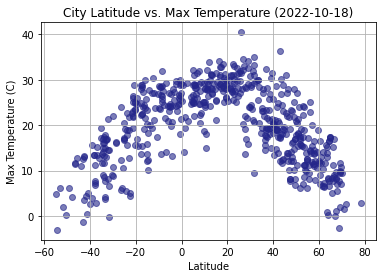

<Figure size 576x432 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']

plt.scatter(x,y,c='#24268a', alpha=0.6)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.figure(figsize=(8, 6))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

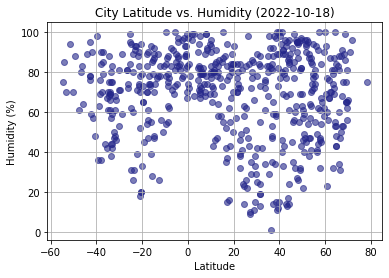

<Figure size 576x432 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']

plt.scatter(x,y,c='#24268a', alpha=0.6)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.figure(figsize=(8, 6))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

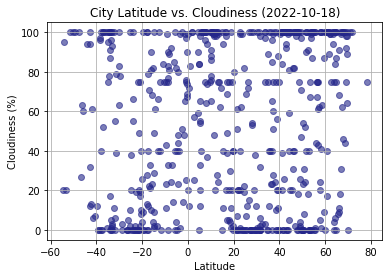

<Figure size 576x432 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']

plt.scatter(x,y,c='#24268a', alpha=0.6)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.figure(figsize=(8, 6))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

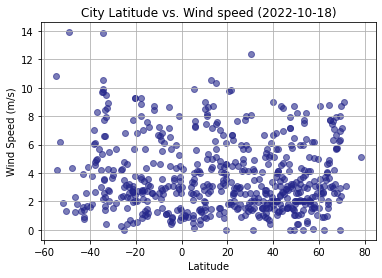

<Figure size 576x432 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']

plt.scatter(x,y,c='#24268a', alpha=0.6)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.figure(figsize=(8, 6))


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_lin_regr(x, y, xt, yt):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    
    print(f"The r-value is: {round(rvalue,2)}")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x,y,c='#24268a', alpha=0.6)
    plt.plot(x,regress_values, c='r', alpha=0.95)
    plt.annotate(line_eq,(0.1,0.1), xycoords='axes fraction',fontsize=15,color="red")

    plt.xlabel(xt)
    plt.ylabel(yt)

    plt.show()  

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ploneour-lanvern,47.9000,-4.2833,14.16,94,0,3.09,FR,1686624409
2,mount pearl,47.5166,-52.7813,7.75,95,100,7.20,CA,1686624187
4,college,64.8569,-147.8028,17.48,43,75,7.72,US,1686623927
6,ust-nera,64.5667,143.2000,7.72,84,100,3.65,RU,1686624163
7,wailua homesteads,22.0669,-159.3780,27.24,80,20,6.69,US,1686624102


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-3.05,85,95,4.25,GS,1686624076
3,barra de santo antonio,-9.4047,-35.5072,23.60,84,23,4.63,BR,1686624410
5,fale old settlement,-9.3852,-171.2468,28.45,78,11,6.64,TK,1686624076
14,port-aux-francais,-49.3500,70.2167,6.16,88,100,13.91,TF,1686624095
15,arraial do cabo,-22.9661,-42.0278,21.81,91,2,3.23,BR,1686624272


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.76


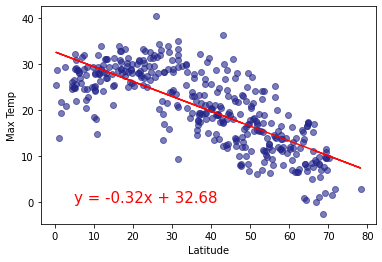

In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
xt = "Latitude"
yt = "Max Temp"

plot_lin_regr(x, y,xt,yt)


The r-value is: 0.76


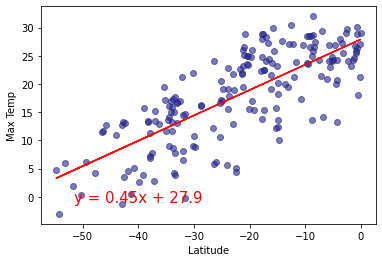

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
xt = "Latitude"
yt = "Max Temp"

plot_lin_regr(x, y,xt,yt)

**Discussion about the linear relationship:** Correlation between latitude and Max Temp is strong. The more to the North/South from equator, the lower Max Temp is.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.07


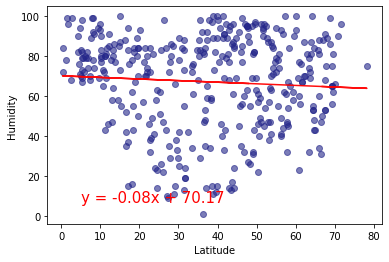

In [17]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
xt = "Latitude"
yt = "Humidity"

plot_lin_regr(x, y,xt,yt)

The r-value is: 0.2


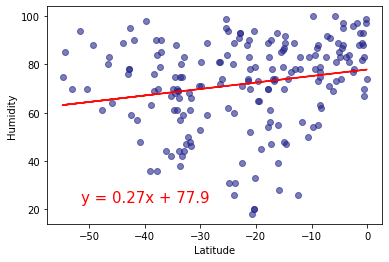

In [18]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
xt = "Latitude"
yt = "Humidity"

plot_lin_regr(x, y,xt,yt)

**Discussion about the linear relationship:** Correlation between Latitude and Humidity is poor. Level of Humidity cannot be predicted by the Latitude of the location.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04


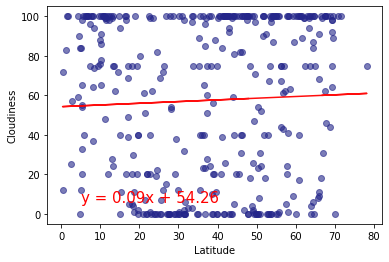

In [19]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
xt = "Latitude"
yt = "Cloudiness"

plot_lin_regr(x, y,xt,yt)

The r-value is: -0.01


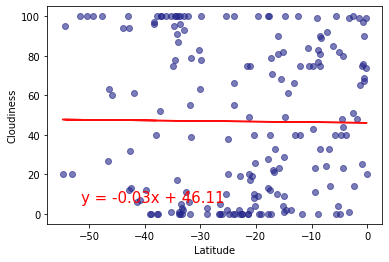

In [20]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
xt = "Latitude"
yt = "Cloudiness"

plot_lin_regr(x, y,xt,yt)

**Discussion about the linear relationship:** Correlation between Latitude and Cloudiness is poor. Level of Cloudiness cannot be predicted by the Latitude of the location.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02


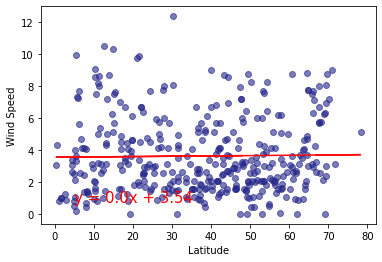

In [21]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
xt = "Latitude"
yt = "Wind Speed"

plot_lin_regr(x, y,xt,yt)

The r-value is: -0.15


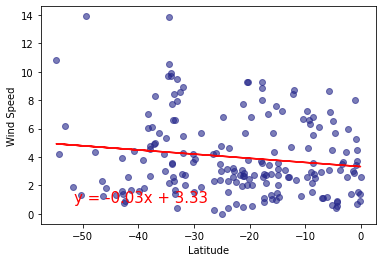

In [22]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
xt = "Latitude"
yt = "Wind Speed"

plot_lin_regr(x, y,xt,yt)

**Discussion about the linear relationship:** Correlation between Latitude and Wind Speed is poor. Wind Speed cannot be predicted by the Latitude of the location.